In [ ]:
#!pip install spotipy

In [ ]:
# Import libraries section

#import chart_studio.plotly as py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import psycopg2
import seaborn as sns
import spotipy


from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from spotipy.oauth2 import SpotifyClientCredentials


In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id=spotify_client_id, client_secret=spotify_client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
conn = psycopg2.connect(elephant_credencials )
songs = pd.read_sql_query('SELECT * FROM spotify_table', conn)
conn.close()

In [ ]:
# chart_studio.tools.set_credentials_file(username='CodingDuckmx', api_key='BJDTaHirN1qxM6uaTXhS')

In [ ]:
# songs = songs.drop(labels='Unnamed: 0', axis=1)
print(songs.shape)
songs.head()

(58223, 16)


,artist_name,track_name,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Kesha,Cannibal,3JTMWdhcJPiegDSe7SvZS3,80,0.710,0.680,1,-4.676,1,0.1060,0.007800,0.016500,0.0493,0.571,129.971,4
1,Ty Segall,Finger,1osYkIYegkLLnPutvItBta,50,0.237,0.481,8,-3.680,1,0.0337,0.000406,0.005230,0.0512,0.133,143.719,4
2,Pendulum,Crush,6hzwfFKrTabeUsW5SWti17,54,0.418,0.906,2,-3.754,1,0.0368,0.000013,0.021600,0.1640,0.164,173.998,4
3,Susie Suh,I Do,1rZFC696WndvqvpFfjr4Wu,57,0.766,0.191,7,-12.606,1,0.0394,0.932000,0.000008,0.2610,0.262,104.030,4
4,E.U.,Da Butt,29O9cSdpmLZKFcTRMlnqo2,49,0.663,0.879,10,-13.101,0,0.0563,0.023300,0.000434,0.0594,0.752,97.122,4


In [ ]:
songs = songs.drop_duplicates(['id'])
songs.shape

(58223, 16)

In [ ]:


searched_song_id = '5btajcsxRxmzW9FI6P9TWi'

api_result = sp.track(searched_song_id)
api_features_results = sp.audio_features(searched_song_id)

searched_song_info = {'artist_name' : api_result['artists'][0]['name'],
                      'track_name' : api_result['name'],
                      'id' : searched_song_id,
                      'popularity': api_result['popularity'],
                      'danceability': api_features_results[0]['danceability'],
                      'energy':api_features_results[0]['energy'],
                      'key':api_features_results[0]['key'],
                      'loudness':api_features_results[0]['loudness'],
                      'mode':api_features_results[0]['mode'],
                      'speechiness':api_features_results[0]['speechiness'],
                      'acousticness':api_features_results[0]['acousticness'],
                      'instrumentalness':api_features_results[0]['instrumentalness'],
                      'liveness':api_features_results[0]['liveness'],
                      'valence':api_features_results[0]['valence'],
                      'tempo':api_features_results[0]['tempo'],
                      'time_signature':api_features_results[0]['time_signature']}
                       


In [ ]:
songs = songs.append(searched_song_info, ignore_index=True)



In [ ]:
features = ['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence','popularity']
songs[features] = songs[features].astype(float)
searched_song = songs[features].iloc[-1,:]

In [ ]:
# Founding the cosine of the angule between them.

def cosdist(chosen_song,all_songs):
    ''' Dot product of each song with the chosen song, and normilize to get the cosine between the vectors '''

    normalize_song = chosen_song / np.linalg.norm(chosen_song, keepdims=True)
    normalize_all = all_songs / np.linalg.norm(all_songs, axis=1, keepdims=True)
    dotproduct = normalize_song.dot(normalize_all.T)

    return dotproduct

In [ ]:
distances_list = []
distances = cosdist(searched_song,songs_features)
for i in range(len(songs_features)):
  distances_list.append((i,distances[i]))

distances_list.sort(key=lambda x: x[1])

In [ ]:
similar_songs_index = [distances_list[-42:][i][0] for i in range(len(distances_list[-42:]))]

In [ ]:
similar_songs = songs.loc[similar_songs_index]
similar_songs[similar_songs.duplicated(['track_name'], keep='first')]

,artist_name,track_name,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [ ]:

if (similar_songs['id'] == chosen_song['id']).any():
  similar_songs = similar_songs.drop(labels=similar_songs[similar_songs['id'] == chosen_song['id']].index[0],axis=0)


In [ ]:
ten_more_similar = similar_songs[-10:]
ten_more_similar

,artist_name,track_name,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
13250,$uicideBoy$,Ugly,32vB9E8TE54zObotzAd5Je,53.0,0.533,0.469,9.0,-8.786,0.0,0.1400,0.00428,0.013300,0.3260,0.330,185.664,3.0
12516,Dani and Lizzy,Dancing in the Sky,4kdl5LATOjf8q4bvubBlBI,60.0,0.306,0.310,11.0,-10.371,1.0,0.0336,0.60300,0.000027,0.1120,0.126,207.508,3.0
13148,La Ley De Michoacan,No Me Amenaces / Cuatro Caminos / Ojalá Que Te...,66MmxBNGim0COBMPgccj9L,53.0,0.492,0.527,9.0,-9.490,1.0,0.1170,0.34300,0.000000,0.1210,0.407,177.874,3.0
3428,Carla Morrison,Compartir,50Jd7tX7dMu79Oknn7sXSW,60.0,0.504,0.311,11.0,-10.594,1.0,0.0460,0.54900,0.000001,0.1900,0.466,207.019,3.0
52665,Chalino Sanchez,María De La Luz,0o3TN1U91ifFFyNKG4ZGH9,52.0,0.463,0.512,8.0,-7.305,1.0,0.0501,0.66700,0.000129,0.0815,0.831,181.726,3.0
52952,R.E.M.,Try Not To Breathe,0bPg0OA0ep90qVCYfymwO6,51.0,0.417,0.534,7.0,-9.517,1.0,0.0374,0.08860,0.000943,0.0901,0.602,178.630,3.0
31144,Dolly Parton,Islands In the Stream,4dqEzdFAYkj1rjYLVDuTlN,60.0,0.595,0.473,8.0,-9.828,1.0,0.0347,0.70200,0.000000,0.0725,0.716,204.016,4.0
25003,Mariachi Vargas De Tecalitlan,El son de la negra,1kjMKI2xugTJvBFPZT140r,50.0,0.481,0.561,7.0,-9.101,1.0,0.0498,0.26800,0.013700,0.2550,0.834,170.908,3.0
52528,Chalino Sanchez,Mario Peralta,6HRpgUqFOM2qHJv0jgygu8,57.0,0.485,0.483,8.0,-7.877,1.0,0.0519,0.44000,0.000122,0.2270,0.891,195.009,3.0
36723,Jadakiss,We Gonna Make It - Edit,7LFFSUDnunRvRiE59jVayq,37.0,0.476,0.933,5.0,-5.762,1.0,0.3990,0.15800,0.000030,0.1270,0.694,130.471,1.0


In [ ]:
ten_more_similar[features]

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
13250,0.00428,0.533,0.469,0.013300,9.0,0.3260,-8.786,0.0,0.1400,185.664,3.0,0.330,53.0
12516,0.60300,0.306,0.310,0.000027,11.0,0.1120,-10.371,1.0,0.0336,207.508,3.0,0.126,60.0
13148,0.34300,0.492,0.527,0.000000,9.0,0.1210,-9.490,1.0,0.1170,177.874,3.0,0.407,53.0
3428,0.54900,0.504,0.311,0.000001,11.0,0.1900,-10.594,1.0,0.0460,207.019,3.0,0.466,60.0
52665,0.66700,0.463,0.512,0.000129,8.0,0.0815,-7.305,1.0,0.0501,181.726,3.0,0.831,52.0
52952,0.08860,0.417,0.534,0.000943,7.0,0.0901,-9.517,1.0,0.0374,178.630,3.0,0.602,51.0
31144,0.70200,0.595,0.473,0.000000,8.0,0.0725,-9.828,1.0,0.0347,204.016,4.0,0.716,60.0
25003,0.26800,0.481,0.561,0.013700,7.0,0.2550,-9.101,1.0,0.0498,170.908,3.0,0.834,50.0
52528,0.44000,0.485,0.483,0.000122,8.0,0.2270,-7.877,1.0,0.0519,195.009,3.0,0.891,57.0
36723,0.15800,0.476,0.933,0.000030,5.0,0.1270,-5.762,1.0,0.3990,130.471,1.0,0.694,37.0


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,outcome
0,0.00428,0.533,0.469,0.013300,9.0,0.3260,-8.786,0.0,0.1400,185.664,3.0,0.330,1
1,0.60300,0.306,0.310,0.000027,11.0,0.1120,-10.371,1.0,0.0336,207.508,3.0,0.126,1
2,0.34300,0.492,0.527,0.000000,9.0,0.1210,-9.490,1.0,0.1170,177.874,3.0,0.407,1
3,0.54900,0.504,0.311,0.000001,11.0,0.1900,-10.594,1.0,0.0460,207.019,3.0,0.466,1
4,0.66700,0.463,0.512,0.000129,8.0,0.0815,-7.305,1.0,0.0501,181.726,3.0,0.831,1
5,0.08860,0.417,0.534,0.000943,7.0,0.0901,-9.517,1.0,0.0374,178.630,3.0,0.602,1
6,0.70200,0.595,0.473,0.000000,8.0,0.0725,-9.828,1.0,0.0347,204.016,4.0,0.716,1
7,0.26800,0.481,0.561,0.013700,7.0,0.2550,-9.101,1.0,0.0498,170.908,3.0,0.834,1
8,0.44000,0.485,0.483,0.000122,8.0,0.2270,-7.877,1.0,0.0519,195.009,3.0,0.891,1
9,0.15800,0.476,0.933,0.000030,5.0,0.1270,-5.762,1.0,0.3990,130.471,1.0,0.694,1


In [ ]:
extendend_result_for_plot = extendend_result.T.reset_index()
extendend_result_for_plot = extendend_result_for_plot.rename({0: 'Recomendation 1',1: 'Recomendation 2',2: 'Recomendation 3',
                                                             3: 'Recomendation 4',4: 'Recomendation 5',5: 'Recomendation 6',
                                                             6: 'Recomendation 7',7: 'Recomendation 8',8: 'Recomendation 9',
                                                             9: 'Recomendation 10',10: 'Base Song'}, axis=1)

extendend_result_for_plot.iloc[:,1:] = scale(extendend_result_for_plot.iloc[:,1:], axis=0)
extendend_result_for_plot

,index,Recomendation 1,Recomendation 2,Recomendation 3,Recomendation 4,Recomendation 5,Recomendation 6,Recomendation 7,Recomendation 8,Recomendation 9,Recomendation 10,Base Song
0,acousticness,-0.297992,-0.287642,-0.292009,-0.289132,-0.288594,-0.293522,-0.285467,-0.291841,-0.292012,-0.295624,-0.294347
1,danceability,-0.287304,-0.293013,-0.288865,-0.289948,-0.292814,-0.286626,-0.287436,-0.287164,-0.291144,-0.286465,-0.279308
2,energy,-0.288598,-0.292940,-0.288127,-0.293446,-0.291801,-0.284170,-0.289682,-0.285407,-0.291183,-0.273304,-0.277833
3,instrumentalness,-0.297810,-0.298546,-0.299245,-0.299084,-0.302390,-0.295362,-0.298386,-0.297425,-0.300488,-0.300173,-0.294653
4,key,-0.116147,-0.099634,-0.109368,-0.099686,-0.136895,-0.148404,-0.151162,-0.144023,-0.146325,-0.156175,-0.136314
5,liveness,-0.291489,-0.296521,-0.296692,-0.295639,-0.300706,-0.293490,-0.297052,-0.292126,-0.296116,-0.296516,-0.286010
6,loudness,-0.475685,-0.486084,-0.499460,-0.491121,-0.453512,-0.495209,-0.479252,-0.497560,-0.452287,-0.466119,-0.476721
7,mode,-0.298079,-0.280463,-0.278148,-0.280956,-0.281705,-0.274385,-0.279983,-0.275768,-0.281220,-0.271374,-0.270354
8,speechiness,-0.295249,-0.297938,-0.296777,-0.298250,-0.301356,-0.294597,-0.297748,-0.296632,-0.299491,-0.288683,-0.295430
9,tempo,3.455057,3.453808,3.453449,3.453557,3.457010,3.455285,3.456134,3.454980,3.457484,3.457368,3.456130


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

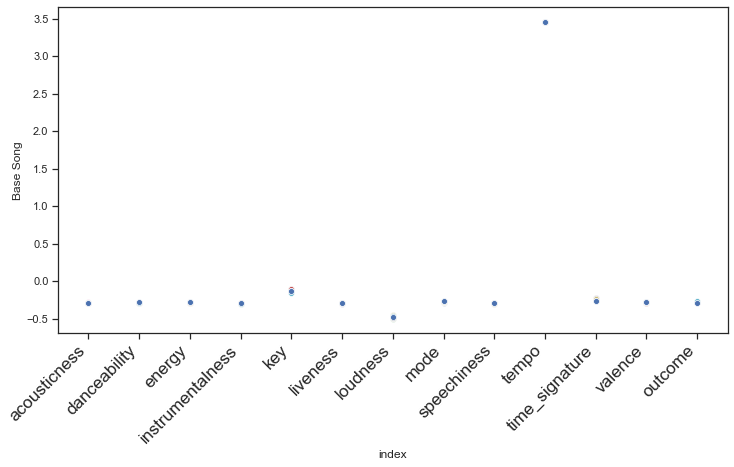

In [ ]:

plt.figure(figsize=(12,6))


scatter0 = sns.scatterplot(x='index', y='Recomendation 1', data =extendend_result_for_plot)
scatter1 = sns.scatterplot(x='index', y='Recomendation 2', data =extendend_result_for_plot)
scatter2 = sns.scatterplot(x='index', y='Recomendation 3', data =extendend_result_for_plot)
scatter3 = sns.scatterplot(x='index', y='Recomendation 4', data =extendend_result_for_plot)
scatter4 = sns.scatterplot(x='index', y='Recomendation 5', data =extendend_result_for_plot)
scatter5 = sns.scatterplot(x='index', y='Recomendation 6', data =extendend_result_for_plot)
scatter6 = sns.scatterplot(x='index', y='Recomendation 7', data =extendend_result_for_plot)
scatter7 = sns.scatterplot(x='index', y='Recomendation 8', data =extendend_result_for_plot)
scatter8 = sns.scatterplot(x='index', y='Recomendation 9', data =extendend_result_for_plot)
scatter9 = sns.scatterplot(x='index', y='Recomendation 10', data =extendend_result_for_plot)
scatter10 = sns.scatterplot(x='index', y='Base Song', data =extendend_result_for_plot)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [ ]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[10,:],
                    mode='markers',
                    name='Actual fav'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[0,:],
                    mode='markers',
                    name='Recomendation 1'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[1,:],
                    mode='markers',
                    name='Recomendation 2'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[2,:],
                    mode='markers',
                    name='Recomendation 3'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[3,:],
                    mode='markers',
                    name='Recomendation 4'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[4,:],
                    mode='markers',
                    name='Recomendation 5'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[5,:],
                    mode='markers',
                    name='Recomendation 6'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[6,:],
                    mode='markers',
                    name='Recomendation 7'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[7,:],
                    mode='markers',
                    name='Recomendation 8'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[6,:],
                    mode='markers',
                    name='Recomendation 9'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[7,:],
                    mode='markers',
                    name='Recomendation 10'))

py.iplot(fig, filename='features', sharing='public')

In [ ]:

figs = make_subplots(rows=3, cols=4, shared_yaxes=True)

figs.add_trace(go.Scatter(x=extendend_result_for_plot.index, y=extendend_result['acousticness']),
              row=1, col=1)

figs.add_trace(go.Scatter(x=extendend_result_for_plot.index, y=extendend_result['danceability']),
              row=1, col=2)

figs.add_trace(go.Scatter(x=extendend_result_for_plot.index, y=extendend_result['key']),
              row=2, col=1)

figs.add_trace(go.Scatter(x=extendend_result_for_plot.index, y=extendend_result['loudness']),
              row=2, col=2)

figs.update_layout(height=600, width=600,
                  title_text="Multiple Subplots with Shared Y-Axes")

py.iplot(figs, filename='subplots', sharing='public')

In [ ]:
extendend_result

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,outcome
0,0.00428,0.533,0.469,0.013300,9.0,0.3260,-8.786,0.0,0.1400,185.664,3.0,0.330,1
1,0.60300,0.306,0.310,0.000027,11.0,0.1120,-10.371,1.0,0.0336,207.508,3.0,0.126,1
2,0.34300,0.492,0.527,0.000000,9.0,0.1210,-9.490,1.0,0.1170,177.874,3.0,0.407,1
3,0.54900,0.504,0.311,0.000001,11.0,0.1900,-10.594,1.0,0.0460,207.019,3.0,0.466,1
4,0.66700,0.463,0.512,0.000129,8.0,0.0815,-7.305,1.0,0.0501,181.726,3.0,0.831,1
5,0.08860,0.417,0.534,0.000943,7.0,0.0901,-9.517,1.0,0.0374,178.630,3.0,0.602,1
6,0.70200,0.595,0.473,0.000000,8.0,0.0725,-9.828,1.0,0.0347,204.016,4.0,0.716,1
7,0.26800,0.481,0.561,0.013700,7.0,0.2550,-9.101,1.0,0.0498,170.908,3.0,0.834,1
8,0.44000,0.485,0.483,0.000122,8.0,0.2270,-7.877,1.0,0.0519,195.009,3.0,0.891,1
9,0.15800,0.476,0.933,0.000030,5.0,0.1270,-5.762,1.0,0.3990,130.471,1.0,0.694,1
